## Ligand stability

Here, you can find an example of ligand stability calculations during the equilibration phase, demonstrated through three scenarios: equilibration without restraints, equilibration with pairwise distance restraints, and equilibration with Boresh restraints.

First, we aim to identify all pairs between the heavy atoms of the ligand and the heavy atoms of the protein backbone that are around 10 angstroms from the ligand.

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis.distances import dist
from MDAnalysis.lib.distances import calc_dihedrals
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt


from scipy.stats import gaussian_kde

#Replace with paths to your own trajectory and topology files
u = mda.Universe("./traj_files/no_restr/no_restr.top", "./traj_files/no_restr/no_restr.xtc", topology_format='ITP', include_dir="/home/diankin/progs/gmx2023-cuda/share/gromacs/top")

lig_heavy = u.select_atoms("resname LIG and not name H*")

anchors_dict = {}
for lig_atom in lig_heavy:
    for prot_atom in u.select_atoms(f"(protein or resname PRT) and (around 10 index {lig_atom.index}) and (not name H*) and backbone"): # protein does not recognise PRT
        anchors_dict[(lig_atom.index,prot_atom.index)]={}
        anchors_dict[(lig_atom.index, prot_atom.index)]["dists"]=[]
        
for frame in u.trajectory:
    for lig_atom_index, prot_atom_index in anchors_dict.keys():
        distance = dist(mda.AtomGroup([u.atoms[lig_atom_index]]), mda.AtomGroup([u.atoms[prot_atom_index]]), box=frame.dimensions)[2][0]
        anchors_dict[(lig_atom_index,prot_atom_index)]["dists"].append(distance)

Then, we need to gather statistics on the average length of these distances during dynamics, including the standard deviation from the mean value.

In [3]:
# change lists to numpy arrays
for pair in anchors_dict.keys():
    anchors_dict[pair]["dists"] = np.array(anchors_dict[pair]["dists"])
    
# calculate average and SD
for pair in anchors_dict.keys():
    anchors_dict[pair]["avg_dist"] = anchors_dict[pair]["dists"].mean()
    anchors_dict[pair]["sd_dist"] = anchors_dict[pair]["dists"].std()   

    
# get n pairs with lowest SD
pairs_ordered_sd=[]
for item in sorted(anchors_dict.items(), key=lambda item: item[1]["avg_dist"]):
    if item[1]["sd_dist"] <= 0.40:    
        pairs_ordered_sd.append(item[0])
        print(f'Pair: {item[0]}, av distance: {item[1]["avg_dist"]:.2f}, SD: {item[1]["sd_dist"]:.2f}')

distances_l = []
sds_l = []

for item in sorted(anchors_dict.items(), key=lambda item: item[1]["avg_dist"]):
    if item[1]["sd_dist"] <= 10000:
        distances_l.append(item[1]["avg_dist"])
        sds_l.append(item[1]["sd_dist"])
        print(f'Pair: {item[0]}, av distance: {item[1]["avg_dist"]:.2f}, SD: {item[1]["sd_dist"]:.2f}')
    
distances_n = np.array(distances_l)
sds_l = np.array(sds_l)
len(sds_l)

Pair: (4, 2627), av distance: 2.77, SD: 0.10
Pair: (35, 2627), av distance: 3.04, SD: 0.15
Pair: (0, 1602), av distance: 3.08, SD: 0.16
Pair: (34, 2627), av distance: 3.12, SD: 0.14
Pair: (43, 2627), av distance: 3.14, SD: 0.20
Pair: (15, 2627), av distance: 3.16, SD: 0.23
Pair: (6, 1618), av distance: 3.33, SD: 0.20
Pair: (33, 2627), av distance: 3.42, SD: 0.11
Pair: (16, 1580), av distance: 3.46, SD: 0.17
Pair: (26, 1618), av distance: 3.60, SD: 0.25
Pair: (5, 1660), av distance: 3.61, SD: 0.29
Pair: (40, 2605), av distance: 3.63, SD: 0.28
Pair: (22, 2627), av distance: 3.63, SD: 0.23
Pair: (10, 2627), av distance: 3.63, SD: 0.26
Pair: (23, 2627), av distance: 3.63, SD: 0.15
Pair: (36, 2616), av distance: 3.65, SD: 0.22
Pair: (42, 1102), av distance: 3.66, SD: 0.37
Pair: (16, 1602), av distance: 3.66, SD: 0.20
Pair: (40, 2608), av distance: 3.72, SD: 0.23
Pair: (28, 1640), av distance: 3.74, SD: 0.35
Pair: (41, 2608), av distance: 3.76, SD: 0.20
Pair: (28, 1658), av distance: 3.77, S

Pair: (38, 1199), av distance: 8.86, SD: 0.49
Pair: (14, 798), av distance: 8.86, SD: 0.36
Pair: (5, 577), av distance: 8.87, SD: 0.50
Pair: (21, 2686), av distance: 8.87, SD: 0.41
Pair: (42, 2606), av distance: 8.87, SD: 0.21
Pair: (6, 558), av distance: 8.87, SD: 0.35
Pair: (8, 2450), av distance: 8.87, SD: 0.48
Pair: (32, 2468), av distance: 8.87, SD: 0.59
Pair: (5, 449), av distance: 8.87, SD: 0.54
Pair: (15, 1108), av distance: 8.88, SD: 0.38
Pair: (33, 837), av distance: 8.88, SD: 0.41
Pair: (43, 2605), av distance: 8.88, SD: 0.23
Pair: (34, 1165), av distance: 8.88, SD: 0.49
Pair: (6, 1676), av distance: 8.88, SD: 0.31
Pair: (38, 2588), av distance: 8.88, SD: 0.38
Pair: (39, 2410), av distance: 8.88, SD: 0.51
Pair: (37, 1103), av distance: 8.88, SD: 0.62
Pair: (27, 426), av distance: 8.88, SD: 0.54
Pair: (21, 2450), av distance: 8.88, SD: 0.36
Pair: (42, 1128), av distance: 8.88, SD: 0.39
Pair: (19, 2448), av distance: 8.89, SD: 0.53
Pair: (24, 2654), av distance: 8.89, SD: 0.39

3852

Finally, we can visualize the results.

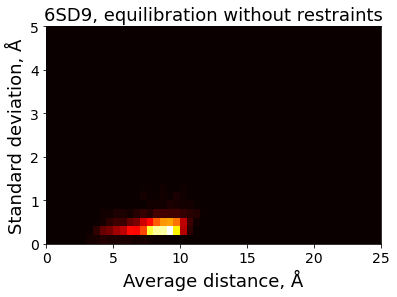

In [4]:
kde = gaussian_kde([distances_n, sds_l])
xmin, ymin = distances_n.min(), sds_l.min()
xmax, ymax = distances_n.max(), sds_l.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

zz = kde(np.vstack([xx.flatten(), yy.flatten()]))

plt.hist2d(distances_n, sds_l, bins=[50, 25], range=[[0, 25], [0, 5]], cmap='hot')
plt.title("6SD9, equilibration without restraints", fontsize=18)
plt.xlabel('Average distance, Å', fontsize=18)
plt.ylabel('Standard deviation, Å', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("/home/diankin/6sd9_fb_norestr.png", dpi=600,bbox_inches='tight')
plt.show()

### Pairwise distant restraints

In [5]:
from scipy.stats import gaussian_kde

#Replace with paths to your own trajectory and topology files
u = mda.Universe("./traj_files/dist_restr/dist_restr.top", "./traj_files/dist_restr/dist_restr.xtc", topology_format='ITP', include_dir="/home/diankin/inmed/analysis")

lig_heavy = u.select_atoms("resname LIG and not name H*")

anchors_dict = {}
for lig_atom in lig_heavy:
    for prot_atom in u.select_atoms(f"(protein or resname PRT) and (around 10 index {lig_atom.index}) and (not name H*) and backbone"): # protein does not recognise PRT
        anchors_dict[(lig_atom.index,prot_atom.index)]={}
        anchors_dict[(lig_atom.index, prot_atom.index)]["dists"]=[]
        
for frame in u.trajectory:
    for lig_atom_index, prot_atom_index in anchors_dict.keys():
        distance = dist(mda.AtomGroup([u.atoms[lig_atom_index]]), mda.AtomGroup([u.atoms[prot_atom_index]]), box=frame.dimensions)[2][0]
        anchors_dict[(lig_atom_index,prot_atom_index)]["dists"].append(distance)

In [6]:
# change lists to numpy arrays
for pair in anchors_dict.keys():
    anchors_dict[pair]["dists"] = np.array(anchors_dict[pair]["dists"])
    
# calculate average and SD
for pair in anchors_dict.keys():
    anchors_dict[pair]["avg_dist"] = anchors_dict[pair]["dists"].mean()
    anchors_dict[pair]["sd_dist"] = anchors_dict[pair]["dists"].std()   

    
# get n pairs with lowest SD
pairs_ordered_sd=[]
for item in sorted(anchors_dict.items(), key=lambda item: item[1]["avg_dist"]):
    if item[1]["sd_dist"] <= 0.40:    
        pairs_ordered_sd.append(item[0])
        print(f'Pair: {item[0]}, av distance: {item[1]["avg_dist"]:.2f}, SD: {item[1]["sd_dist"]:.2f}')

distances_l = []
sds_l = []

for item in sorted(anchors_dict.items(), key=lambda item: item[1]["avg_dist"]):
    if item[1]["sd_dist"] <= 10000:
        distances_l.append(item[1]["avg_dist"])
        sds_l.append(item[1]["sd_dist"])
        print(f'Pair: {item[0]}, av distance: {item[1]["avg_dist"]:.2f}, SD: {item[1]["sd_dist"]:.2f}')
    
distances_n = np.array(distances_l)
sds_l = np.array(sds_l)
len(sds_l)

Pair: (4, 2627), av distance: 2.69, SD: 0.20
Pair: (0, 1602), av distance: 3.22, SD: 0.27
Pair: (36, 2616), av distance: 3.34, SD: 0.37
Pair: (6, 1618), av distance: 3.46, SD: 0.39
Pair: (16, 1580), av distance: 3.48, SD: 0.34
Pair: (4, 2626), av distance: 3.53, SD: 0.32
Pair: (41, 2608), av distance: 3.93, SD: 0.38
Pair: (9, 1602), av distance: 3.98, SD: 0.29
Pair: (3, 1618), av distance: 4.04, SD: 0.36
Pair: (35, 2626), av distance: 4.10, SD: 0.33
Pair: (0, 1600), av distance: 4.11, SD: 0.25
Pair: (23, 2626), av distance: 4.14, SD: 0.40
Pair: (6, 1617), av distance: 4.16, SD: 0.29
Pair: (4, 2628), av distance: 4.22, SD: 0.33
Pair: (9, 1604), av distance: 4.29, SD: 0.30
Pair: (16, 1579), av distance: 4.50, SD: 0.39
Pair: (16, 1600), av distance: 4.58, SD: 0.40
Pair: (23, 2628), av distance: 4.60, SD: 0.34
Pair: (9, 1617), av distance: 4.75, SD: 0.37
Pair: (3, 1617), av distance: 4.97, SD: 0.40
Pair: (9, 1600), av distance: 5.04, SD: 0.38
Pair: (0, 1601), av distance: 5.17, SD: 0.26
Pa

4048

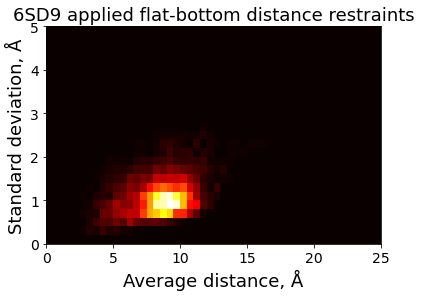

In [7]:
kde = gaussian_kde([distances_n, sds_l])
xmin, ymin = distances_n.min(), sds_l.min()
xmax, ymax = distances_n.max(), sds_l.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

zz = kde(np.vstack([xx.flatten(), yy.flatten()]))


plt.hist2d(distances_n, sds_l, bins=[50, 25], range=[[0, 25], [0, 5]], cmap='hot')
plt.title("6SD9 applied flat-bottom distance restraints", fontsize=18)
plt.xlabel('Average distance, Å', fontsize=18)
plt.ylabel('Standard deviation, Å', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("/home/diankin/6sd9_fb_restr.png", dpi=600,bbox_inches='tight')
plt.show()

### Boresh restraints

In [8]:
from scipy.stats import gaussian_kde

#Replace with paths to your own trajectory and topology files
u = mda.Universe("./traj_files/boresh_restr/boresh_restr.top", "./traj_files/boresh_restr/boresh_restr.xtc", topology_format='ITP', include_dir="/home/diankin/progs/gmx2023-cuda/share/gromacs/top")

lig_heavy = u.select_atoms("resname LIG and not name H*")

anchors_dict = {}
for lig_atom in lig_heavy:
    for prot_atom in u.select_atoms(f"(protein or resname PRT) and (around 20 index {lig_atom.index}) and (not name H*) and backbone"): # protein does not recognise PRT
        anchors_dict[(lig_atom.index,prot_atom.index)]={}
        anchors_dict[(lig_atom.index, prot_atom.index)]["dists"]=[]
        
for frame in u.trajectory:
    for lig_atom_index, prot_atom_index in anchors_dict.keys():
        distance = dist(mda.AtomGroup([u.atoms[lig_atom_index]]), mda.AtomGroup([u.atoms[prot_atom_index]]), box=frame.dimensions)[2][0]
        anchors_dict[(lig_atom_index,prot_atom_index)]["dists"].append(distance)

In [9]:
# change lists to numpy arrays
for pair in anchors_dict.keys():
    anchors_dict[pair]["dists"] = np.array(anchors_dict[pair]["dists"])
    
# calculate average and SD
for pair in anchors_dict.keys():
    anchors_dict[pair]["avg_dist"] = anchors_dict[pair]["dists"].mean()
    anchors_dict[pair]["sd_dist"] = anchors_dict[pair]["dists"].std()   

    
# get n pairs with lowest SD
pairs_ordered_sd=[]
for item in sorted(anchors_dict.items(), key=lambda item: item[1]["avg_dist"]):
    if item[1]["sd_dist"] <= 0.40:    
        pairs_ordered_sd.append(item[0])
        print(f'Pair: {item[0]}, av distance: {item[1]["avg_dist"]:.2f}, SD: {item[1]["sd_dist"]:.2f}')

distances_l = []
sds_l = []

for item in sorted(anchors_dict.items(), key=lambda item: item[1]["avg_dist"]):
    if item[1]["sd_dist"] <= 10000:
        distances_l.append(item[1]["avg_dist"])
        sds_l.append(item[1]["sd_dist"])
        print(f'Pair: {item[0]}, av distance: {item[1]["avg_dist"]:.2f}, SD: {item[1]["sd_dist"]:.2f}')
    
distances_n = np.array(distances_l)
sds_l = np.array(sds_l)
len(sds_l)

Pair: (5, 1660), av distance: 3.82, SD: 0.31
Pair: (5, 1664), av distance: 5.85, SD: 0.37
Pair: (5, 1657), av distance: 5.96, SD: 0.40
Pair: (6, 1618), av distance: 3.29, SD: 1.20
Pair: (26, 1618), av distance: 3.42, SD: 0.80
Pair: (0, 1602), av distance: 3.74, SD: 1.55
Pair: (3, 1618), av distance: 3.79, SD: 1.03
Pair: (5, 1660), av distance: 3.82, SD: 0.31
Pair: (5, 1618), av distance: 3.82, SD: 0.83
Pair: (3, 1660), av distance: 3.98, SD: 0.49
Pair: (0, 1604), av distance: 4.05, SD: 1.63
Pair: (27, 1618), av distance: 4.05, SD: 1.05
Pair: (26, 1640), av distance: 4.12, SD: 1.23
Pair: (6, 1617), av distance: 4.12, SD: 1.26
Pair: (9, 1618), av distance: 4.14, SD: 1.26
Pair: (1, 1660), av distance: 4.21, SD: 0.73
Pair: (5, 1658), av distance: 4.23, SD: 0.44
Pair: (2, 1660), av distance: 4.27, SD: 0.85
Pair: (27, 1640), av distance: 4.27, SD: 1.51
Pair: (26, 1658), av distance: 4.33, SD: 0.51
Pair: (26, 1660), av distance: 4.37, SD: 0.41
Pair: (9, 1602), av distance: 4.37, SD: 1.38
Pair

Pair: (44, 2672), av distance: 11.76, SD: 2.01
Pair: (15, 575), av distance: 11.76, SD: 5.00
Pair: (4, 2589), av distance: 11.77, SD: 3.98
Pair: (13, 411), av distance: 11.77, SD: 4.93
Pair: (4, 2657), av distance: 11.77, SD: 3.02
Pair: (17, 1340), av distance: 11.77, SD: 1.36
Pair: (8, 2566), av distance: 11.77, SD: 2.04
Pair: (7, 1733), av distance: 11.77, SD: 1.93
Pair: (25, 2376), av distance: 11.77, SD: 2.90
Pair: (40, 531), av distance: 11.77, SD: 5.37
Pair: (41, 2710), av distance: 11.77, SD: 4.38
Pair: (34, 2657), av distance: 11.77, SD: 3.96
Pair: (28, 1566), av distance: 11.77, SD: 1.36
Pair: (25, 2719), av distance: 11.77, SD: 2.49
Pair: (5, 454), av distance: 11.78, SD: 1.13
Pair: (20, 2672), av distance: 11.78, SD: 1.63
Pair: (12, 1309), av distance: 11.78, SD: 0.96
Pair: (32, 1732), av distance: 11.78, SD: 2.39
Pair: (24, 2452), av distance: 11.78, SD: 2.49
Pair: (15, 2616), av distance: 11.78, SD: 4.85
Pair: (18, 1290), av distance: 11.78, SD: 1.40
Pair: (6, 599), av dis

Pair: (38, 2344), av distance: 15.72, SD: 5.59
Pair: (16, 632), av distance: 15.72, SD: 1.80
Pair: (22, 761), av distance: 15.72, SD: 3.20
Pair: (6, 1261), av distance: 15.72, SD: 0.87
Pair: (41, 1534), av distance: 15.72, SD: 4.51
Pair: (45, 1617), av distance: 15.72, SD: 3.63
Pair: (40, 2589), av distance: 15.72, SD: 4.23
Pair: (20, 1261), av distance: 15.72, SD: 2.20
Pair: (18, 2059), av distance: 15.72, SD: 1.84
Pair: (36, 2590), av distance: 15.72, SD: 4.84
Pair: (12, 1164), av distance: 15.72, SD: 0.99
Pair: (0, 1247), av distance: 15.72, SD: 1.35
Pair: (8, 2307), av distance: 15.72, SD: 1.72
Pair: (42, 1694), av distance: 15.73, SD: 4.57
Pair: (15, 1577), av distance: 15.73, SD: 2.94
Pair: (10, 2333), av distance: 15.73, SD: 5.61
Pair: (29, 478), av distance: 15.73, SD: 2.80
Pair: (24, 332), av distance: 15.73, SD: 3.75
Pair: (13, 2554), av distance: 15.73, SD: 3.98
Pair: (19, 2347), av distance: 15.73, SD: 1.61
Pair: (38, 363), av distance: 15.73, SD: 6.69
Pair: (2, 1840), av d

Pair: (25, 2174), av distance: 18.44, SD: 2.51
Pair: (22, 294), av distance: 18.44, SD: 3.53
Pair: (33, 760), av distance: 18.44, SD: 3.87
Pair: (43, 1368), av distance: 18.44, SD: 4.56
Pair: (38, 2363), av distance: 18.44, SD: 6.03
Pair: (37, 603), av distance: 18.44, SD: 5.26
Pair: (22, 309), av distance: 18.44, SD: 3.65
Pair: (25, 313), av distance: 18.45, SD: 3.11
Pair: (36, 1088), av distance: 18.45, SD: 5.55
Pair: (10, 2550), av distance: 18.45, SD: 4.00
Pair: (35, 2552), av distance: 18.45, SD: 4.26
Pair: (19, 1514), av distance: 18.45, SD: 1.60
Pair: (0, 290), av distance: 18.45, SD: 1.40
Pair: (38, 1053), av distance: 18.45, SD: 6.21
Pair: (24, 1232), av distance: 18.45, SD: 2.90
Pair: (3, 850), av distance: 18.45, SD: 1.00
Pair: (14, 632), av distance: 18.45, SD: 1.62
Pair: (3, 2739), av distance: 18.45, SD: 2.21
Pair: (43, 1165), av distance: 18.45, SD: 4.42
Pair: (45, 1323), av distance: 18.45, SD: 5.14
Pair: (41, 2479), av distance: 18.46, SD: 3.48
Pair: (11, 1859), av dis

Pair: (41, 2943), av distance: 24.88, SD: 5.35
Pair: (45, 3318), av distance: 24.88, SD: 6.97
Pair: (39, 229), av distance: 24.88, SD: 5.63
Pair: (45, 2876), av distance: 24.89, SD: 6.28
Pair: (45, 3092), av distance: 24.89, SD: 6.75
Pair: (36, 2236), av distance: 24.90, SD: 6.06
Pair: (31, 1901), av distance: 24.90, SD: 3.09
Pair: (22, 179), av distance: 24.91, SD: 2.46
Pair: (34, 270), av distance: 24.91, SD: 5.09
Pair: (45, 940), av distance: 24.91, SD: 6.70
Pair: (43, 197), av distance: 24.91, SD: 4.21
Pair: (15, 2150), av distance: 24.92, SD: 6.07
Pair: (34, 197), av distance: 24.92, SD: 3.96
Pair: (39, 2255), av distance: 24.93, SD: 6.91
Pair: (23, 181), av distance: 24.93, SD: 2.67
Pair: (36, 2212), av distance: 24.94, SD: 5.91
Pair: (37, 162), av distance: 24.94, SD: 5.33
Pair: (35, 146), av distance: 24.94, SD: 4.64
Pair: (31, 1913), av distance: 24.95, SD: 3.08
Pair: (36, 148), av distance: 24.96, SD: 5.19
Pair: (10, 270), av distance: 24.96, SD: 5.18
Pair: (36, 3257), av dis

22338

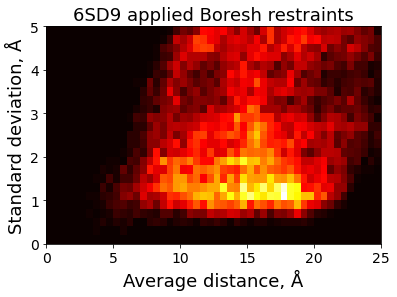

In [10]:
kde = gaussian_kde([distances_n, sds_l])
xmin, ymin = distances_n.min(), sds_l.min()
xmax, ymax = distances_n.max(), sds_l.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

zz = kde(np.vstack([xx.flatten(), yy.flatten()]))


plt.hist2d(distances_n, sds_l, bins=[50, 25], range=[[0, 25], [0, 5]], cmap='hot')
plt.title("6SD9 applied Boresh restraints", fontsize=  18)
plt.xlabel('Average distance, Å', fontsize= 18)
plt.ylabel('Standard deviation, Å', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("/home/diankin/6sd9_boresh_restr.png", dpi=600,bbox_inches='tight')
plt.show()